In [171]:
import math
import cv2
import numpy as np
import random
import os
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### image path list

In [149]:
train_path = 'E:/data/coco/trainvalno5k.txt'
batch_size = 16
img_size = 416

In [143]:
with open(train_path, 'r') as file:
    img_files1 = file.readlines()

In [126]:
len(img_files1)

117264

In [129]:
img_files1 = [img.replace('/e','E:') for img in img_files1]

In [144]:
img_files1[:5]

['E:/yolov3-master/data/images/train2014/COCO_train2014_000000000009.jpg\n',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000025.jpg\n',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000030.jpg\n',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000034.jpg\n',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000036.jpg\n']

In [131]:
img_files2 = [x.replace('\n', '') for x in img_files1] # replace /n
img_files2[:5]

['E:/yolov3-master/data/images/train2014/COCO_train2014_000000000009.jpg',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000025.jpg',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000030.jpg',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000034.jpg',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000036.jpg']

In [132]:
# filter函数：http://www.runoob.com/python/python-func-filter.html
#这里确保img_files里每行都是一条合法路径，如果长度为0，则为空，则不是正确的路径。
img_files3 = list(filter(lambda x: len(x) > 0, img_files2))
img_files3[:5]

['E:/yolov3-master/data/images/train2014/COCO_train2014_000000000009.jpg',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000025.jpg',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000030.jpg',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000034.jpg',
 'E:/yolov3-master/data/images/train2014/COCO_train2014_000000000036.jpg']

In [32]:
len(img_files3) # 82081 + 40137

117264

In [39]:
82081 + 40137

122218

In [33]:
img_files[1]

'/e/yolov3-master/data/images/train2014/COCO_train2014_000000000025.jpg'

#### label 

In [46]:
label_files = [x.replace('images', 'labels').replace('.png', '.txt').replace('.jpg', '.txt') for x in img_files] #label path
label_files[:5]

['/e/yolov3-master/data/labels/train2014/COCO_train2014_000000000009.txt',
 '/e/yolov3-master/data/labels/train2014/COCO_train2014_000000000025.txt',
 '/e/yolov3-master/data/labels/train2014/COCO_train2014_000000000030.txt',
 '/e/yolov3-master/data/labels/train2014/COCO_train2014_000000000034.txt',
 '/e/yolov3-master/data/labels/train2014/COCO_train2014_000000000036.txt']

In [43]:
img = img_files[1]
img = img.replace('images', 'labels');img

'/e/yolov3-master/data/labels/train2014/COCO_train2014_000000000025.jpg'

In [45]:
img.replace('.png', '.txt');img # replace找不到要替代的字符串就返回原串

'/e/yolov3-master/data/labels/train2014/COCO_train2014_000000000025.jpg'

In [47]:
img.replace('.jpg', '.txt');img

'/e/yolov3-master/data/labels/train2014/COCO_train2014_000000000025.jpg'

In [48]:
nF = len(img_files);nF

117264

In [51]:
nB = math.ceil(nF / batch_size);nB

7329

In [58]:
# np.random.permutation
# 如果传给permutation一个矩阵，它会返回一个洗牌后的矩阵副本;
# 如果传入一个整数，它会返回一个洗牌后的arange。
# shuffle只是对一个矩阵进行洗牌，无返回值.
np.random.permutation(9)

array([0, 6, 1, 8, 4, 7, 5, 3, 2])

In [59]:
np.random.permutation([1, 4, 9, 12, 15])

array([15,  9,  4,  1, 12])

In [63]:
shuffled_vector = np.random.permutation(nF)
img_files[shuffled_vector[9]]

'/e/yolov3-master/data/images/train2014/COCO_train2014_000000341696.jpg'

In [64]:
label_files[shuffled_vector[9]]

'/e/yolov3-master/data/labels/train2014/COCO_train2014_000000341696.txt'

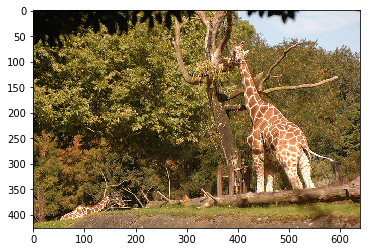

In [92]:
img_path = 'COCO_train2014_000000000025.jpg'
img1 = cv2.imread(img_path)
#cv2.imshow('ImageWindow', img1)
#cv2.waitKey()

import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.show()

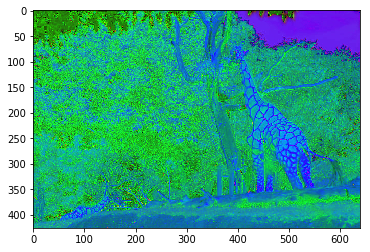

In [4]:
img_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV) # BGR2HSV
plt.imshow(img_hsv)
plt.show()

In [8]:
img1.shape

(426, 640, 3)

In [9]:
def letterbox(img, height=416, color=(127.5, 127.5, 127.5)):  # resize a rectangular image to a padded square
    shape = img.shape[:2]  # shape = [height, width]
    ratio = float(height) / max(shape)  # ratio  = old / new
    new_shape = (round(shape[1] * ratio), round(shape[0] * ratio))
    dw = (height - new_shape[0]) / 2  # width padding
    dh = (height - new_shape[1]) / 2  # height padding
    top, bottom = round(dh - 0.1), round(dh + 0.1)
    left, right = round(dw - 0.1), round(dw + 0.1)
    img = cv2.resize(img, new_shape, interpolation=cv2.INTER_AREA)  # resized, no border
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # padded square
    return img, ratio, dw, dh

In [88]:
img, ratio, padw, padh = letterbox(img1, height=608);img.shape

(608, 608, 3)

In [11]:
ratio # 608/640

0.95

In [13]:
padw

0.0

In [14]:
padh

101.5

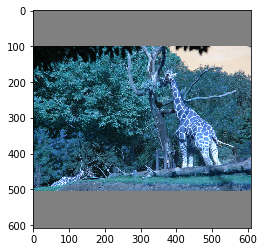

In [89]:
plt.imshow(img)
plt.show()

In [71]:
annotation = 'E:/yolov3-master/data/annotations/instances_train2014.json' 
with open(annotation, encoding='utf-8') as f:
    line = f.read()
    d = json.loads(line)

In [74]:
for img in d['images']:
    if img['file_name'] == 'COCO_train2014_000000000025.jpg':
        print(img['id'])

25


In [75]:
# COCO_train2014_000000000025.jpg 的bbx
for img in d['annotations']:
    if img['image_id'] == 25:
        print(img['bbox'])

[385.53, 60.03, 214.97, 297.16]
[53.01, 356.49, 132.03, 55.19]


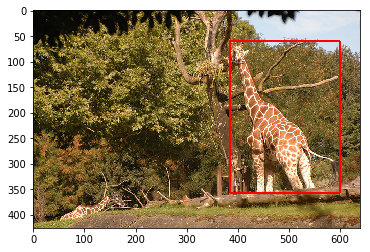

In [76]:
image = mpimg.imread(img_path)
_, x, y, w, h = labels[0]
cv2.rectangle(image, (int(385.53),int(60.03)), (int(385.53+214.97),int(60.03+297.16)), (255,0,0), 2) 
plt.imshow(image)
#plt.axis('off')
plt.show()

In [115]:
# original annotation of image
img_path = 'E:/data/coco/images/train2014/COCO_train2014_000000000025.jpg'
label_path = img_path.replace('images', 'labels').replace('.png', '.txt').replace('.jpg', '.txt');label_path

'E:/data/coco/labels/train2014/COCO_train2014_000000000025.txt'

In [109]:
labels = np.loadtxt(label_path, dtype=np.float32).reshape(-1, 5);labels

array([[23.      ,  0.770336,  0.489695,  0.335891,  0.697559],
       [23.      ,  0.185977,  0.901608,  0.206297,  0.129554]],
      dtype=float32)

In [97]:
# labels中txt记录的是归一化后的中心点和宽度和高度的坐标。
640*0.770336 - 640*0.335891/2

385.52992

In [99]:
640*0.335891

214.97024

In [111]:
# coordinates to image size， -> xywh
w, h, _ = image.shape
labels0 = labels.copy()
labels0[:,1] = labels0[:,1] * h - h * labels[:,3]/2
labels0[:,2] = labels0[:,2] * w - w * labels[:,4]/2
labels0[:,3] = labels0[:,3] * h
labels0[:,4] = labels0[:,4] * w
labels0

array([[ 23.      , 385.5299  ,  60.030014, 214.97025 , 297.16013 ],
       [ 23.      ,  53.01024 , 356.49    , 132.03008 ,  55.190006]],
      dtype=float32)

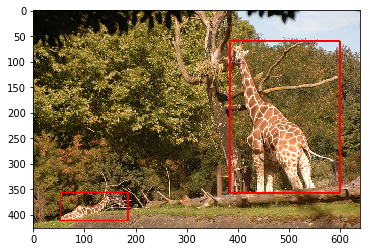

In [116]:
image = mpimg.imread(img_path)

for i in range(len(labels0)):
    _, x, y, w, h = labels0[i]
    cv2.rectangle(image, (int(x),int(y)), (int(x+w),int(y+h)), (255,0,0), 2) # image, 左上顶点, 右下顶点, color, line_length
plt.imshow(image)
#plt.axis('off')
plt.show()

In [161]:
class LoadImagesAndLabels:  # for training
    def __init__(self, path, batch_size=1, img_size=608, augment=False):
        with open(path, 'r') as file:
            self.img_files = file.readlines()
            self.img_files = [x.replace('\n', '') for x in self.img_files]       #replace \n
            self.img_files = list(filter(lambda x: len(x) > 0, self.img_files))  #确保路径有效

        self.label_files = [x.replace('images', 'labels').replace('.png', '.txt').replace('.jpg', '.txt')
                            for x in self.img_files]  # label path

        self.nF = len(self.img_files)  # number of image files
        self.nB = math.ceil(self.nF / batch_size)  # number of batches
        self.batch_size = batch_size
        self.img_size = img_size
        self.augment = augment

        assert self.nF > 0, 'No images found in %s' % path

    def __iter__(self):
        self.count = -1
        self.shuffled_vector = np.random.permutation(self.nF) if self.augment else np.arange(self.nF) # shuffled_vector
        return self

    def __next__(self):
        self.count += 1
        if self.count == self.nB:
            raise StopIteration

        ia = self.count * self.batch_size
        ib = min((self.count + 1) * self.batch_size, self.nF)

        img_all, labels_all, img_paths, img_shapes = [], [], [], []
        for index, files_index in enumerate(range(ia, ib)): # one batch
            img_path = self.img_files[self.shuffled_vector[files_index]]     # '/train2014/COCO_train2014_000000341696.jpg'
            label_path = self.label_files[self.shuffled_vector[files_index]] # '/train2014/COCO_train2014_000000341696.txt'

            img = cv2.imread(img_path)  # BGR
            assert img is not None, 'File Not Found ' + img_path

            augment_hsv = True  
            if self.augment and augment_hsv:
                # SV augmentation by 50%
                fraction = 0.50
                img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                S = img_hsv[:, :, 1].astype(np.float32)
                V = img_hsv[:, :, 2].astype(np.float32)

                a = (random.random() * 2 - 1) * fraction + 1
                S *= a
                if a > 1:
                    np.clip(S, a_min=0, a_max=255, out=S)

                a = (random.random() * 2 - 1) * fraction + 1
                V *= a
                if a > 1:
                    np.clip(V, a_min=0, a_max=255, out=V)

                img_hsv[:, :, 1] = S.astype(np.uint8)
                img_hsv[:, :, 2] = V.astype(np.uint8)
                cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR, dst=img)

            h, w, _ = img.shape
            img, ratio, padw, padh = letterbox(img, height=self.img_size) # resize

            # Load labels
            if os.path.isfile(label_path):
                labels0 = np.loadtxt(label_path, dtype=np.float32).reshape(-1, 5)

                # Normalized xywh to pixel xyxy format
                labels = labels0.copy()
                labels[:, 1] = ratio * w * (labels0[:, 1] - labels0[:, 3] / 2) + padw
                labels[:, 2] = ratio * h * (labels0[:, 2] - labels0[:, 4] / 2) + padh
                labels[:, 3] = ratio * w * (labels0[:, 1] + labels0[:, 3] / 2) + padw
                labels[:, 4] = ratio * h * (labels0[:, 2] + labels0[:, 4] / 2) + padh
            else:
                labels = np.array([])

            # Augment image and labels
            if self.augment:
                img, labels, M = random_affine(img, labels, degrees=(-5, 5), translate=(0.10, 0.10), scale=(0.90, 1.10))

            plotFlag = False
            if plotFlag:
                import matplotlib.pyplot as plt
                plt.figure(figsize=(10, 10)) if index == 0 else None
                plt.subplot(4, 4, index + 1).imshow(img[:, :, ::-1])
                plt.plot(labels[:, [1, 3, 3, 1, 1]].T, labels[:, [2, 2, 4, 4, 2]].T, '.-')
                plt.axis('off')

            nL = len(labels)
            if nL > 0:
                # convert xyxy to xywh
                labels[:, 1:5] = xyxy2xywh(labels[:, 1:5].copy()) / self.img_size

            if self.augment:
                # random left-right flip
                lr_flip = True
                if lr_flip & (random.random() > 0.5):
                    img = np.fliplr(img)
                    if nL > 0:
                        labels[:, 1] = 1 - labels[:, 1]

                # random up-down flip
                ud_flip = False
                if ud_flip & (random.random() > 0.5):
                    img = np.flipud(img)
                    if nL > 0:
                        labels[:, 2] = 1 - labels[:, 2]

            if nL > 0:
                labels = np.concatenate((np.zeros((nL, 1), dtype='float32') + index, labels), 1) # add index to the first col
                labels_all.append(labels)

            img_all.append(img)
            img_paths.append(img_path)
            img_shapes.append((h, w))

        # Normalize
        img_all = np.stack(img_all)[:, :, :, ::-1].transpose(0, 3, 1, 2)  # BGR to RGB and cv2 to pytorch
        img_all = np.ascontiguousarray(img_all, dtype=np.float32)
        img_all /= 255.0

        labels_all = torch.from_numpy(np.concatenate(labels_all, 0))
        return torch.from_numpy(img_all), labels_all, img_paths, img_shapes

    def __len__(self):
        return self.nB  # number of batches

In [165]:
def random_affine(img, targets=None, degrees=(-10, 10), translate=(.1, .1), scale=(.9, 1.1), shear=(-2, 2),
                  borderValue=(127.5, 127.5, 127.5)):
    # torchvision.transforms.RandomAffine(degrees=(-10, 10), translate=(.1, .1), scale=(.9, 1.1), shear=(-10, 10))
    # https://medium.com/uruvideo/dataset-augmentation-with-random-homographies-a8f4b44830d4

    border = 0  # width of added border (optional)
    height = max(img.shape[0], img.shape[1]) + border * 2

    # Rotation and Scale
    R = np.eye(3)
    a = random.random() * (degrees[1] - degrees[0]) + degrees[0]
    # a += random.choice([-180, -90, 0, 90])  # 90deg rotations added to small rotations
    s = random.random() * (scale[1] - scale[0]) + scale[0]
    R[:2] = cv2.getRotationMatrix2D(angle=a, center=(img.shape[1] / 2, img.shape[0] / 2), scale=s)

    # Translation
    T = np.eye(3)
    T[0, 2] = (random.random() * 2 - 1) * translate[0] * img.shape[0] + border  # x translation (pixels)
    T[1, 2] = (random.random() * 2 - 1) * translate[1] * img.shape[1] + border  # y translation (pixels)

    # Shear
    S = np.eye(3)
    S[0, 1] = math.tan((random.random() * (shear[1] - shear[0]) + shear[0]) * math.pi / 180)  # x shear (deg)
    S[1, 0] = math.tan((random.random() * (shear[1] - shear[0]) + shear[0]) * math.pi / 180)  # y shear (deg)

    M = S @ T @ R  # Combined rotation matrix. ORDER IS IMPORTANT HERE!!
    imw = cv2.warpPerspective(img, M, dsize=(height, height), flags=cv2.INTER_LINEAR,
                              borderValue=borderValue)  # BGR order borderValue

    # Return warped points also
    if targets is not None:
        if len(targets) > 0:
            n = targets.shape[0]
            points = targets[:, 1:5].copy()
            area0 = (points[:, 2] - points[:, 0]) * (points[:, 3] - points[:, 1])

            # warp points
            xy = np.ones((n * 4, 3))
            xy[:, :2] = points[:, [0, 1, 2, 3, 0, 3, 2, 1]].reshape(n * 4, 2)  # x1y1, x2y2, x1y2, x2y1
            xy = (xy @ M.T)[:, :2].reshape(n, 8)

            # create new boxes
            x = xy[:, [0, 2, 4, 6]]
            y = xy[:, [1, 3, 5, 7]]
            xy = np.concatenate((x.min(1), y.min(1), x.max(1), y.max(1))).reshape(4, n).T

            # apply angle-based reduction
            radians = a * math.pi / 180
            reduction = max(abs(math.sin(radians)), abs(math.cos(radians))) ** 0.5
            x = (xy[:, 2] + xy[:, 0]) / 2
            y = (xy[:, 3] + xy[:, 1]) / 2
            w = (xy[:, 2] - xy[:, 0]) * reduction
            h = (xy[:, 3] - xy[:, 1]) * reduction
            xy = np.concatenate((x - w / 2, y - h / 2, x + w / 2, y + h / 2)).reshape(4, n).T

            # reject warped points outside of image
            np.clip(xy, 0, height, out=xy)
            w = xy[:, 2] - xy[:, 0]
            h = xy[:, 3] - xy[:, 1]
            area = w * h
            ar = np.maximum(w / (h + 1e-16), h / (w + 1e-16))
            i = (w > 4) & (h > 4) & (area / (area0 + 1e-16) > 0.1) & (ar < 10)

            targets = targets[i]
            targets[:, 1:5] = xy[i]

        return imw, targets, M
    else:
        return imw

In [168]:
def xyxy2xywh(x):
    # Convert bounding box format from [x1, y1, x2, y2] to [x, y, w, h]
    y = torch.zeros_like(x) if x.dtype is torch.float32 else np.zeros_like(x)
    y[:, 0] = (x[:, 0] + x[:, 2]) / 2
    y[:, 1] = (x[:, 1] + x[:, 3]) / 2
    y[:, 2] = x[:, 2] - x[:, 0]
    y[:, 3] = x[:, 3] - x[:, 1]
    return y

In [169]:
dataloader = LoadImagesAndLabels(train_path, batch_size, img_size, augment=True)

In [163]:
type(dataloader)

__main__.LoadImagesAndLabels

In [189]:
for i, (imgs, targets, _, _) in enumerate(dataloader):
    print(imgs.shape)
    print(targets.shape)
    if i == 1:
        break

torch.Size([16, 3, 416, 416])
torch.Size([116, 6])
torch.Size([16, 3, 416, 416])
torch.Size([150, 6])


In [174]:
targets[1]

tensor([ 0.0000, 41.0000,  0.1762,  0.0958,  0.2429,  0.1916])

In [175]:
targets[2]

tensor([0.0000e+00, 4.9000e+01, 6.5628e-01, 3.5294e-02, 8.4520e-02, 7.0587e-02])

In [ ]:
# imgs -> torch.Size([16, 3, 416, 416]), batch_size:16, channel: 3, h,w=416
# targets -> torch.Size([117, 6]) 117为该batch中的16张图片中的所有的objects之和；index + 类别 + 坐标 = 6

In [184]:
for index, files_index in enumerate(range(1, 5)):
    print(index,files_index)

0 1
1 2
2 3
3 4


In [185]:
targets[0]

tensor([ 0.0000, 41.0000,  0.3911,  0.5349,  0.7741,  0.8847])

In [186]:
targets[16]

tensor([3.0000, 3.0000, 0.1664, 0.7102, 0.0254, 0.0307])

In [187]:
targets[15]

tensor([3.0000, 3.0000, 0.8141, 0.6510, 0.3717, 0.2861])

In [188]:
for i, (imgs, targets, _, _) in enumerate(dataloader):
    #print(imgs.shape)
    print(targets[:,0])
    if i == 1:
        break

tensor([ 0.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,
         4.,  4.,  4.,  5.,  5.,  6.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,
         9.,  9., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 11., 11.,
        12., 12., 12., 13., 13., 13., 14., 14., 14., 15., 15., 15., 15., 15.])
tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  5.,  6.,
         7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,
         9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10.,
        11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 